# Objective :  Predict Restaurant Ratings
# Regression

## Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.
- Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

- Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.

- Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.

- Interpret the model's results and analyze the most influential features affecting restaurant ratings.

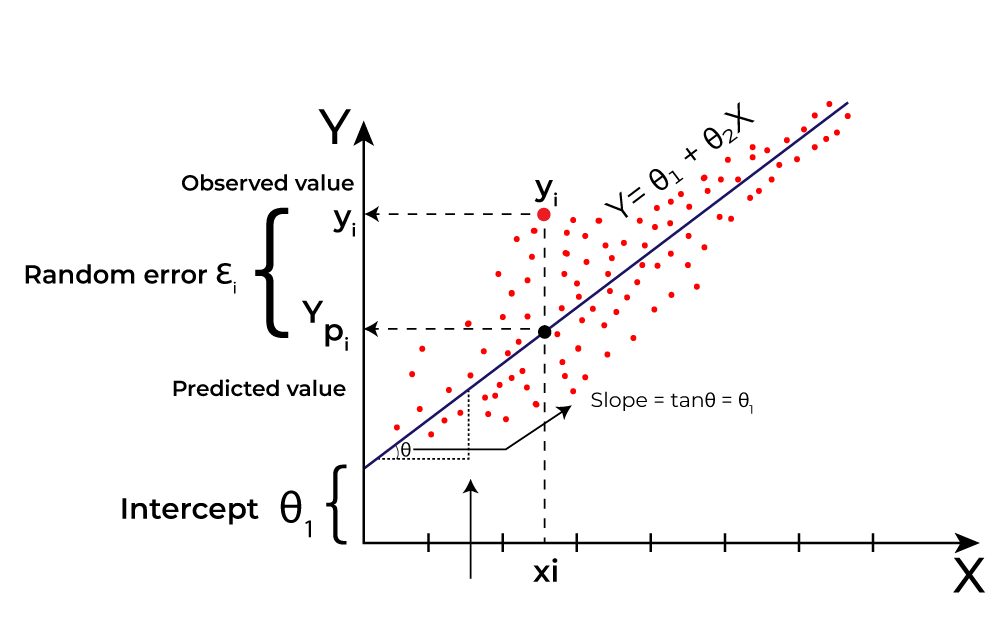

# 1. Load Python Modules

In [6]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (C:\Users\srishanm\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

# 2. Read the Dataset from csv/excel file  - Using Pandas


In [ ]:
file_path=r"Dataset .csv"
df=pd.read_csv(file_path)
df

### 2.1 Non-Significant columns - we need to drop here.
 - we can not find any insights from them

In [ ]:
#drop - sensitive - non imp columns
print(df["Restaurant ID"].nunique())
df.drop("Restaurant ID",axis=1,inplace=True)

# 3. Basic Inspection on given dataset
- Head , tail , sample
- Shape , len , size
- dtypes , columns , info
- isnull().sum() , isna().sum()

In [ ]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(df)

$Observations$
1. Aggregate rating - is target columns - with min 0 and max 5. It is Regression
2. Price range, Votes, Average Cost for two - I consider imp features in Numberical columns
3. Rating text , Rating color are the same - Representing the same  - one in text and another in categorical
3. Has Table booking, Has Online delivery,Rating color -  I consider imp features in categorical columns

# 4. Handling Missing Values - Cat - Variables
 - Replace with Mode - One of the Method

In [ ]:
# No Missing Values - I am skipping this section
df.isnull().sum()

In [ ]:
df.select_dtypes(include='object').columns

# 5. Categorical- UniVariable - Analysis -Using Pipeline
   - Frequency Table 
   - Bar Graph
   - Pie Graph

In [ ]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()         
        

In [ ]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

cat_df = df[[ 'Has Table booking', 'Has Online delivery', 'Rating color']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(cat_df)

# 6. Handling Missing Values in Numerical Columns
- Replace with Median - One of the Method

# 7. Numerical - UniVariable - Analysis - Using -Pipeline
- Frequency Interval - Data Distribution Table
- Histogram Graph
- Hist with KDE Graph
- Box Plots

In [ ]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()


            
        
        

In [ ]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

num_df = df[[ 'Average Cost for two', 'Price range', 'Votes', 'Aggregate rating']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(num_df)

In [ ]:
df_selected = df[[ 'Has Table booking', 'Has Online delivery', 'Rating color', 'Average Cost for two','Price range', 'Votes','Aggregate rating']].copy()

# 8. Numerical - Variables -Outliers Analysis
- IQR Method 
- -3Sigma to +3 Sigma Method

# 9. Bi Variate Analysis

## Cat Vs Num


In [ ]:
df_selected.select_dtypes(include='object').columns


In [ ]:
df_selected.select_dtypes(exclude='object').columns

In [ ]:
target='Aggregate rating'
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot boxplots
for i, ax in zip(['Has Table booking', 'Has Online delivery', 'Rating color'], axes):
    sns.boxplot(x=i, y=target, data=df_selected, ax=ax)
    ax.set_title(f'Boxplot for {i}')
    ax.set_xlabel('')
    ax.set_ylabel('')  # Assuming target variable name is provided elsewhere
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

## Num Vs Num
- Scatter Plot with Hue
- co-relation(co-varaince ,co-relation coffiencnt)
- heatmap

In [ ]:
#print(cars_price_df.columns)
for num_var in ['Average Cost for two', 'Price range', 'Votes']:
    sns.scatterplot(data=df_selected,y=target,x=num_var)
    plt.show()

In [ ]:
 df_selected[['Average Cost for two', 'Price range', 'Votes','Aggregate rating']].corr()

# 10. Data Transformation

### 10.1 left - skewed  to Normal

### 10.2 Right - Skewed  to Normal 

### 10.3 Different distributions to normal distribution

# 11. Standization - Normalization
- Min Max Scaler
- Standard Scaler

# 12. Convert Cat - to - Numerical Columns
- One-Hot-Enconding
- Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_selected['Has Table booking_label_en'] = label_encoder.fit_transform(df_selected['Has Table booking'])
df_selected['Has Online delivery_label_en'] = label_encoder.fit_transform(df_selected['Has Online delivery'])
df_selected['Rating color_label_en'] = label_encoder.fit_transform(df_selected['Rating color'])

In [ ]:
cat_onehot_df = pd.get_dummies(df_selected[['Has Table booking','Has Online delivery','Rating color']],  drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df_final = pd.concat([df_selected, cat_onehot_df], axis=1)
df_final

# 13. Reduce the Number of Columns
- PCA
- tsne

# 14. Inferential statistics test
- chi-square test
- ANOVA Test
- t-test(one and two tail test)
- biserial correlation coefficient

## VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
# the independent variables set 
X = df_final[['Average Cost for two', 'Price range', 'Votes']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

### Label Encoding

In [ ]:
for i in ['Has Table booking_label_en','Has Online delivery_label_en','Rating color_label_en']:
    df_final[i] = df_final[i].astype(int)

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df_final[['Has Table booking_label_en','Has Online delivery_label_en','Rating color_label_en','Average Cost for two', 'Price range', 'Votes']])

# Fit a linear regression model
model = sm.OLS(df_final['Aggregate rating'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df_final[['Has Table booking_label_en','Has Online delivery_label_en','Rating color_label_en', 'Price range', 'Votes']])

# Fit a linear regression model
model = sm.OLS(df_final['Aggregate rating'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")

### One-hot-enconding

In [ ]:
for i in ['Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_White', 'Rating color_Yellow']:
    df_final[i] = df_final[i].astype(int)

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df_final[['Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_White', 'Rating color_Yellow', 'Price range', 'Votes']])

# Fit a linear regression model
model = sm.OLS(df_final['Aggregate rating'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")

$Observations$
- Durbin-Watson (1.876) - Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

# 15. ML - Linear Regression Model

In [ ]:

X=df_final[['Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_White', 'Rating color_Yellow', 'Price range', 'Votes']].copy()
Y=df_final['Aggregate rating']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

In [ ]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
print("Model - Linear Regression")
Y_pred = lr.predict(X_test)
print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)

# Evaluate the model's performance
print("train R squared Score:",lr.score(X_train,Y_train))
print("Test R squared Score:",lr.score(X_test,Y_test))
print("Test R squaredscore:",r2_score(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred))
print("Adj-R squared Score",adjusted_r_squared(Y_test,Y_pred,len(Y_test),10))

$Observations$
1. 'Rating color' feature  is  influential features affecting restaurant ratings.


# 15. Erros - Normaly distributed

In [ ]:
delta_y = Y_test - Y_pred;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw_method=0.5)
plt.show()

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
print("Model - Decision Tree Regression")

# Predict on training set
#Evaluate the model's performance
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R squared Score",r2)

# Predict on test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)
# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R squared Score",r2)
print("Adj-R squared Score",adjusted_r_squared(Y_test,Y_pred,len(Y_test),10))

$Observations$
1. 'Rating color' feature  is  influential features affecting restaurant ratings.
